In [51]:
import sys
sys.path.append("..")

import os
import glob
import numpy as np

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from sicm import io
from sicm.utils import utils
from sicm.plots import plots
from sicm.models.temperature import TemperatureModel, TemperatureModelArray
from sicm.models.comsol import ComsolModel, ComsolData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
datadir = "S:\\UsersData\\Martin\\projects\\thermometry\\comsol\\study12\\results\\_saved\\003"
exp_name = "ecJz" + ".txt"
comd = ComsolData(datadir, exp_name)
comd.data.head()

# datadir = "S:\\UsersData\\Martin\\projects\\thermometry\\comsol\\study5\\results\\_saved\\004"
exp_name = "T_tip" + ".txt"
comt = ComsolData(datadir, exp_name)
comt.data.head()

,rUME (m),d (m),Tsub (K),Temperature (K)
0,9.933934e-09,2.667419e-09,300.0,299.580170
1,9.933934e-09,2.667419e-09,301.0,300.353882
2,9.933934e-09,2.667419e-09,302.0,301.128021
3,9.933934e-09,2.667419e-09,303.0,301.902557
4,9.933934e-09,2.667419e-09,304.0,302.677551


In [53]:
d_pipette = 30e-9
T0 = 298.15

# limit range of substrate sizes to be comparable with pipette diameter
r_sub = comd.data["rUME (m)"].unique()
r_sub = r_sub[np.logical_and(r_sub / d_pipette > 1, r_sub/d_pipette < 50)]

t_sub = comd.data["Tsub (K)"].unique()
t_sub = t_sub[t_sub > 299.0]

tma = TemperatureModelArray(comd.data, comt.data, r_sub, t_sub, d_pipette, T0,
                           comt.datadir, comt.name)

In [54]:
tma.fit()

Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\study12\results\_saved\003\T_tip_T0300K_T1320K_d30nm_.svg.


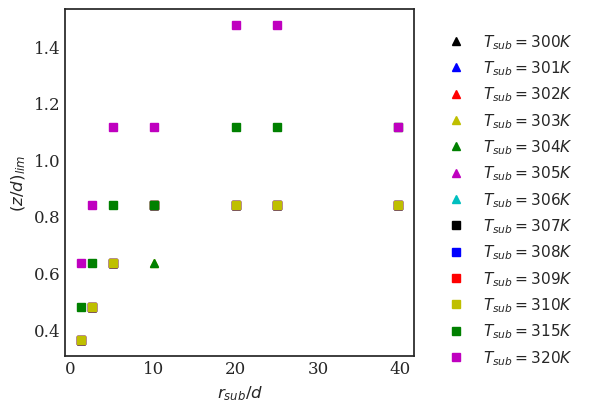

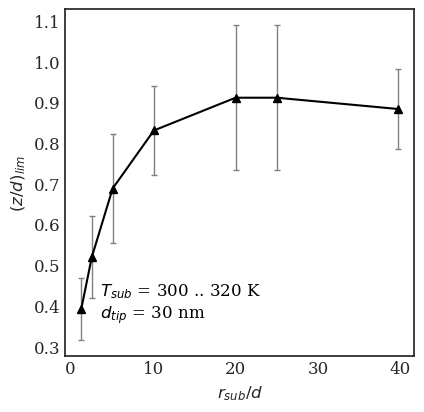

In [77]:
tma.plot_limits()

Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\study12\results\_saved\003\T_tip_T300p00K_d30nm.svg.
Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\study12\results\_saved\003\T_tip_T301p00K_d30nm.svg.
Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\study12\results\_saved\003\T_tip_T302p00K_d30nm.svg.
Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\study12\results\_saved\003\T_tip_T303p00K_d30nm.svg.
Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\study12\results\_saved\003\T_tip_T304p00K_d30nm.svg.
Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\study12\results\_saved\003\T_tip_T305p00K_d30nm.svg.
Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\study12\results\_saved\003\T_tip_T306p00K_d30nm.svg.
Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\study12\results\_saved\003\T_tip_T307p00K_d30nm.svg.
Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\

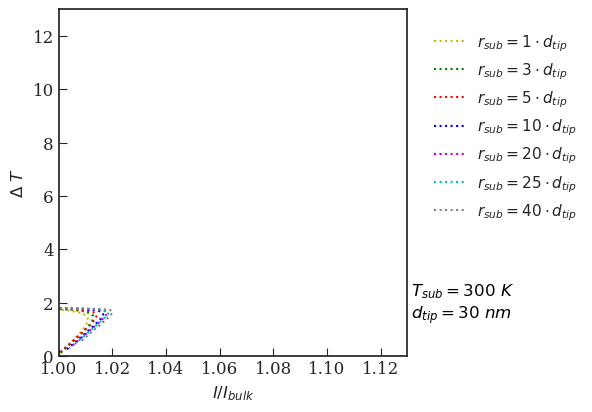

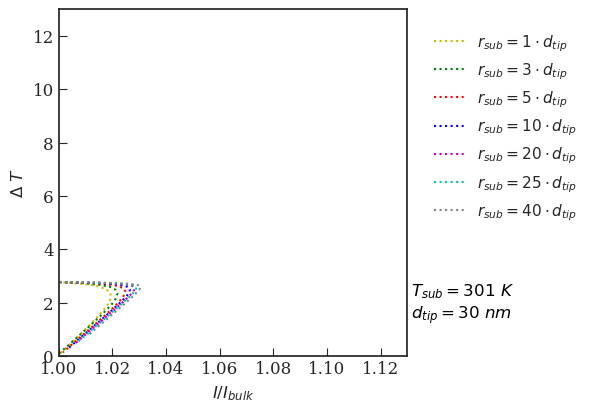

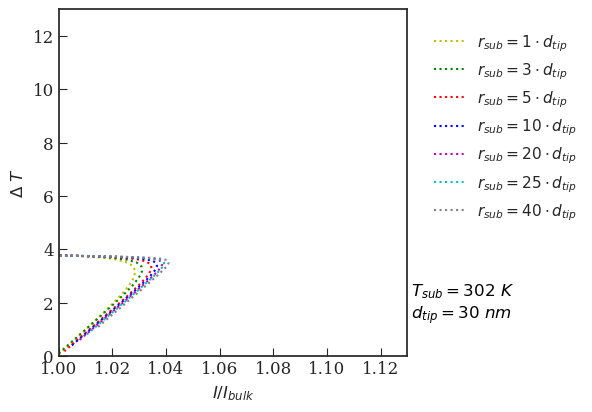

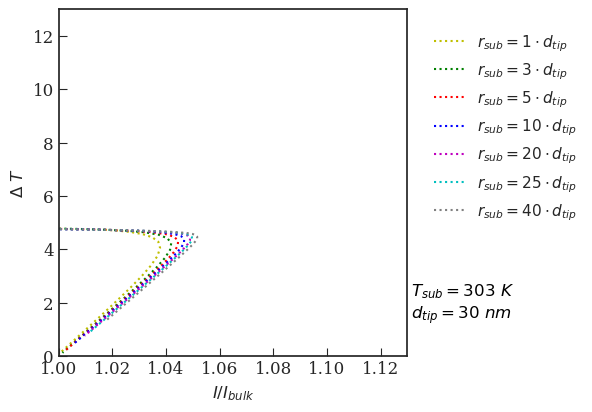

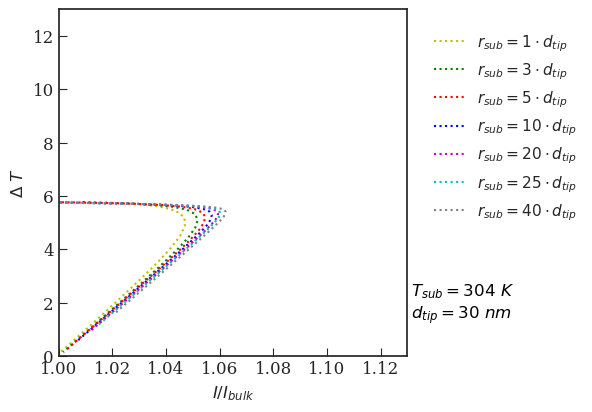

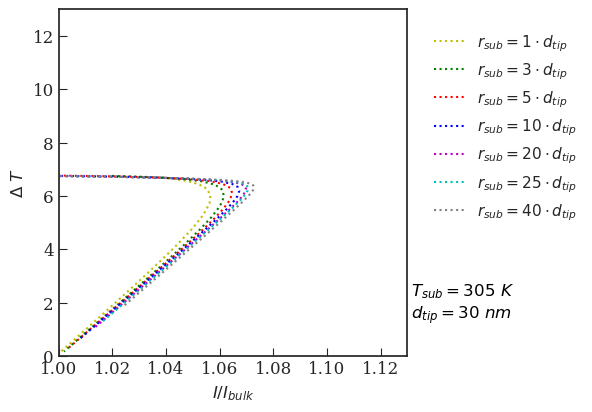

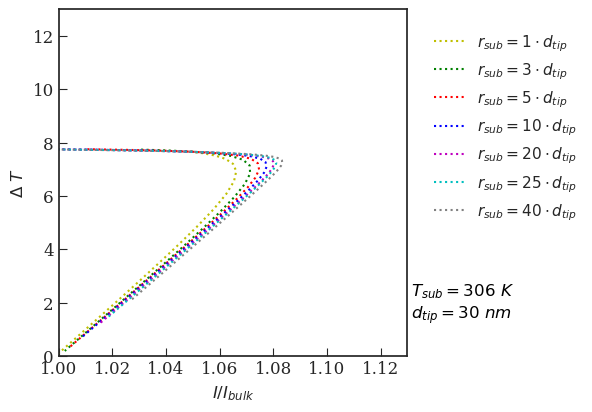

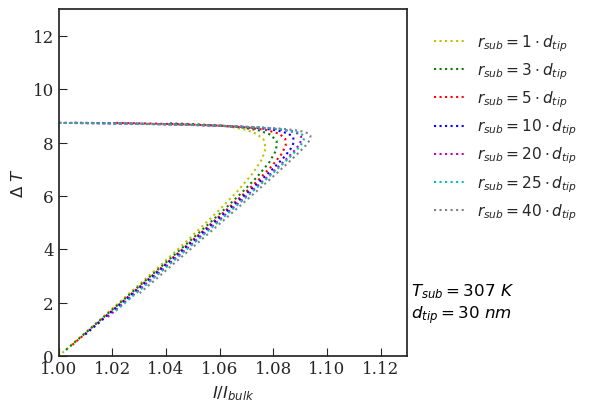

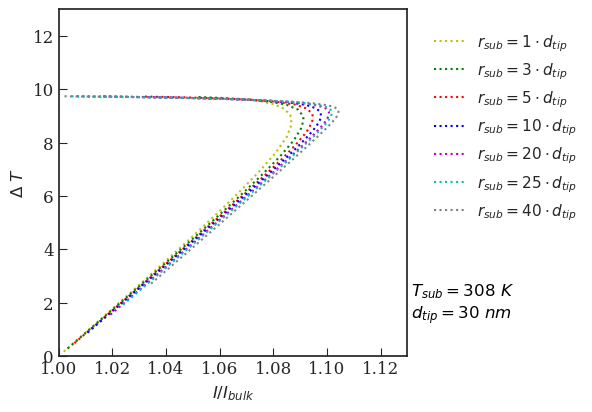

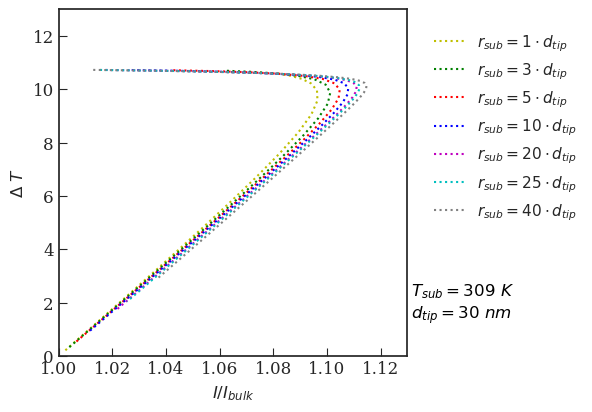

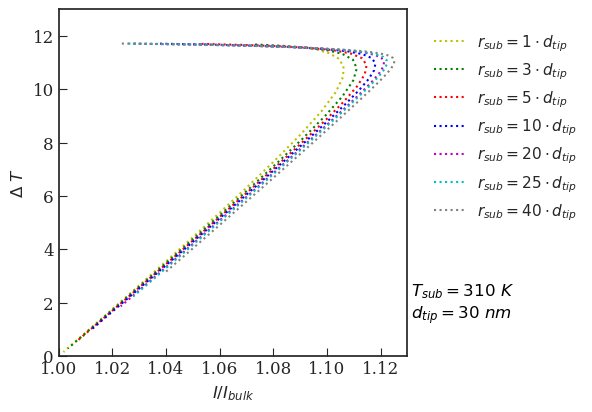

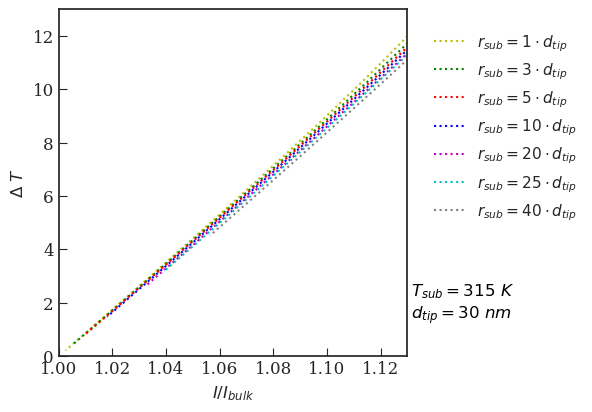

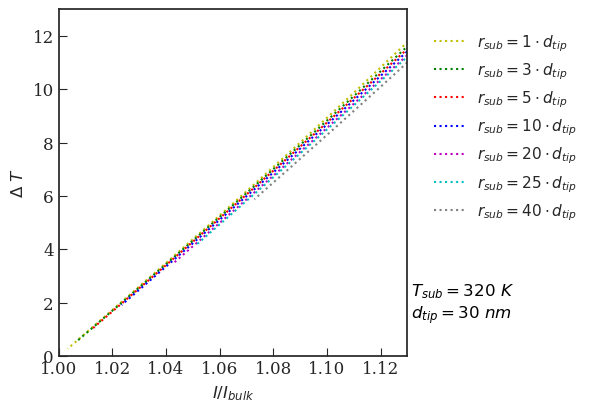

In [37]:
tma.plot_overview()

C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\axes\_base.py:2557: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\axes\_base.py:4215: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\axes\_base.py:844: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()


Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\study12\results\_saved\003\T_tip_T310p00K_d30nm_Fit_app.svg.


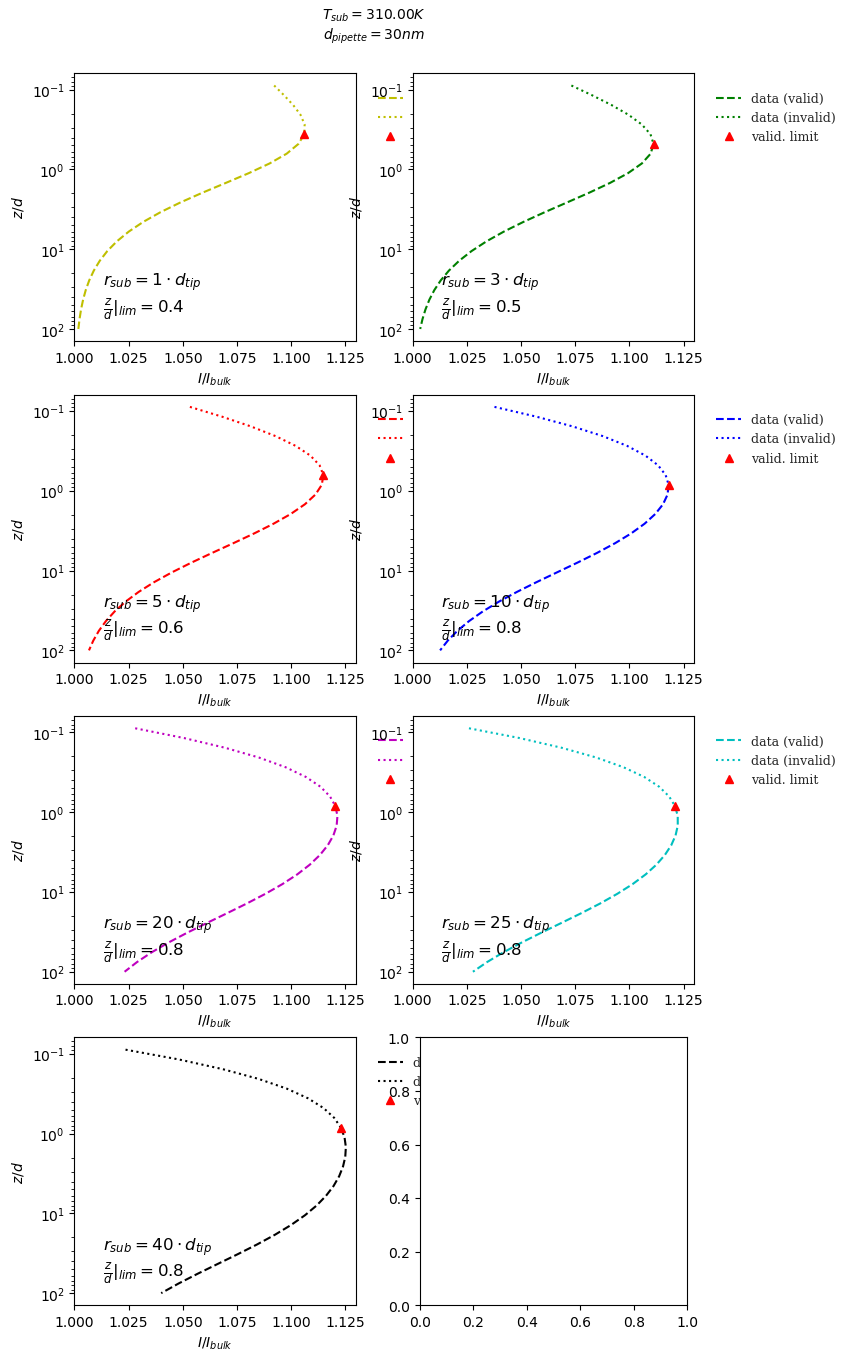

In [50]:
tma.plot_check(plot_approach = True)

Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\study12\results\_saved\003\T_tip_calibration.svg.


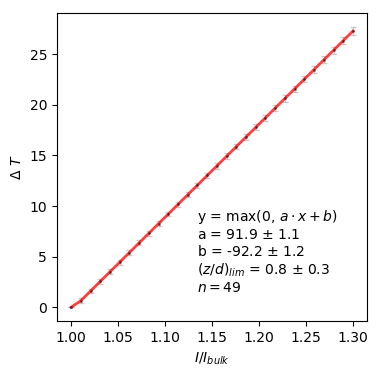

In [17]:
tma.extract_valid_fit(do_plot = True)

In [14]:
test = TemperatureModel(*tuple([1] * 5))

In [15]:
test._fit_wrapper("predict")

(<function sicm.models.temperature.TemperatureModel._fit_wrapper.<locals>._linear_predict(x, *params)>,
 [1, -1])

# Exponential Extension

Often, approach curve will not go all the way towards the very bulk. This happends in numerical and experimental data. To render this data usable, we can fit an exponential extension to the data.

In [1]:
import sys
sys.path.append("..")
import os

from sicm import io, analysis
from sicm.plots import plots
from sicm.sicm import Approach, Signal, ApproachList
import numpy as np

from sicm.models.general import GeneralModel
from sicm.models import functions as funs

%load_ext autoreload
%autoreload 2

Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)', 'Z(um)'])
Number of datapoints = (16063,)
Saved figure to S:\UsersData\Martin\2019\05_May\15\approach4\approach4.pdf.


C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


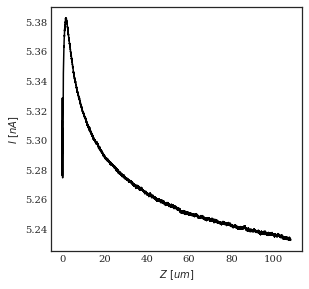

In [2]:
datadir =  "S:\\UsersData\\Martin\\2019\\05_May\\15\\approach4"
exp_name = "approach4"
app = Approach(datadir, exp_name, d_pipette = 220e-9)
app.plot(window_size = 10)

Fitting _exponential_fit to 14896 datapoints ...
Found parameters: [  5.21548132   0.48704047 -14.2140802 ].
Finished in 0.014 s
error on fit: 1.470616281E-03


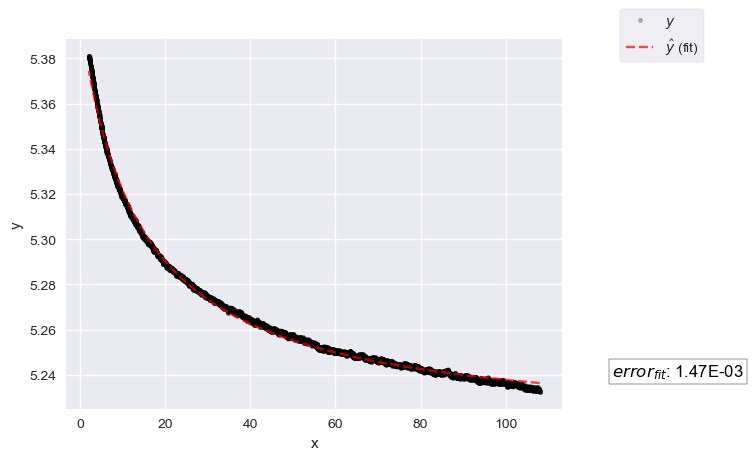

In [4]:
x, y = app.get_xy_data(convert = False, window_size = 10)
sel = x > 2.

gm = GeneralModel(x[sel], y[sel], fun = funs._exponential_fit)
gm.fit(guess = [1, 1, 1], verbose = True, maxfev = np.int(1e6))

In [4]:
x_ax = np.arange(500, 10051, 1)
y_hat = gm.predict(x_ax)

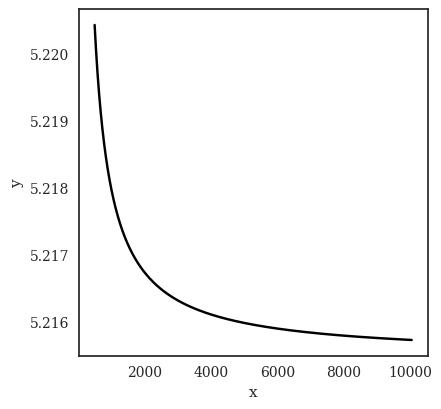

In [5]:
plots.plot_generic([x_ax], [y_hat])

----
### Old Code

In [114]:
d_pipette = 10e-9
plot_approach = False
T0 = 298.15

r_sub = comd.data["rUME (m)"].unique()
# limit range of substrate sizes to be comparable with pipette diameter
r_sub = r_sub[np.logical_and(r_sub / d_pipette > 1, r_sub/d_pipette < 50)]

# Loop over repeats of temperature
popts = {}
for t in comd.data["Tsub (K)"].unique():
    if t < 305: continue # limit range to reasonably high temperature
    xx = [] ; yy = []; TT = []
   
    for rr in r_sub:
        dsub = comd.data[(comd.data["Tsub (K)"] == t) & (comd.data["rUME (m)"] == rr)]
        xx.append(dsub["d (m)"].values / d_pipette)
        yy.append(dsub.iloc[:, 3].values / dsub.iloc[-1, 3])

        dsub2 = comt.data[(comt.data["Tsub (K)"] == t) & (comt.data["rUME (m)"] == rr)]
        col_sel = [col for col in dsub2 if col.startswith("Temperature (K)")]
        TT.append(dsub2[col_sel].values.flatten() - T0)
    
    # Asign instance of Temperature model
    tm = TemperatureModel(xx, yy, TT, T0, t, r_sub/d_pipette, d_pipette)
    
    # Make fpath
    fpath = os.path.join(comt.datadir, comt.name)
    # Make suffix and plot 
#     suffix = "_T{:.2f}K_d{:.0f}nm".format(t, tm.d_pipette*1e9)
#     fname = utils.make_fname(fpath, suffix.replace(".", "p"))
#     tm.plot(fname = fname)
    
    # Fit prediciton model
    tm.fit(err_lim = 2e-1)
    lims = np.asarray([x[i] for i, x in zip(tm.idx, tm.x)])
    popts["{:.2f}".format(t)] = (tm.popt, lims)
    
    # Check fits and save
    suffix = "_T{:.2f}K_d{:.0f}nm_Fit".format(t, tm.d_pipette*1e9)
    fname = utils.make_fname(fpath, suffix.replace(".", "p"))
    tm.check_fit(fname, plot_approach, text_loc = (0.55, 0.15))

TypeError: super(type, obj): obj must be an instance or subtype of type

[('305.00', '1.30', 0.3427441),
 ('305.00', '2.57', 0.44357803),
 ('306.00', '1.30', 0.3427441),
 ('306.00', '2.57', 0.44357803),
 ('307.00', '1.30', 0.3427441),
 ('307.00', '2.57', 0.44357803),
 ('308.00', '1.30', 0.3427441),
 ('308.00', '2.57', 0.44357803),
 ('309.00', '1.30', 0.3427441),
 ('309.00', '2.57', 0.44357803),
 ('310.00', '1.30', 0.3427441),
 ('310.00', '2.57', 0.44357803),
 ('315.00', '1.30', 0.3427441),
 ('318.00', '1.30', 0.3427441),
 ('321.00', '1.30', 0.3427441)]

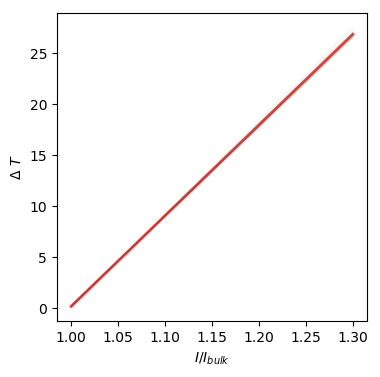

In [92]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
x_ax = np.linspace(1, 1.3, 25)
a = []; b = []
info_bad = []; info_good = []
cs = ["c", "g", "whitesmoke", "y", "b", "pink", "m", "brown", "teal", "skyblue",
     "k", "darkgray", "indigo"]
fmts = ["-" + c for c in cs]

for j, (k, super_v) in enumerate(popts.items()): # loop over temperatures
    xs = []; ys = [] 
    for i, (p, lm) in enumerate(zip(super_v[0], super_v[1])): # loop over r_sub
        y = p[0] * x_ax + p[1] # compute value of the fit
        info = (k, "{:.2f}".format(r_sub[i] / d_pipette), lm)
        if y[0] > 0.25:
            info_bad.append(info)
            continue
        else:
            info_good.append(info)
        a.append(p[0]); b.append(p[1])
        xs.append(x_ax); ys.append(y)
    plots.plot_generic(xs, ys, ["$I / I_{bulk}$"], ["$\Delta\ T$"], fmts = fmts,
                      linewidth = 0.5, alpha = 0.15, ax = ax)
y = np.mean(a) * x_ax + np.mean(b)
ax.plot(x_ax, y, alpha = 0.75, color = "red", linewidth = 2)
info_good

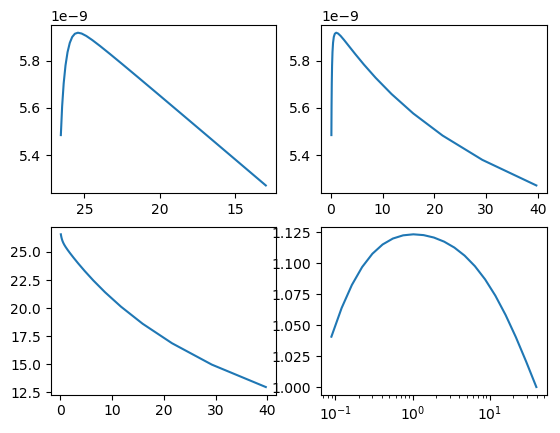

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2); ax = ax.flatten()
ax[0].plot(dsub2["Temperature (K)"].values - T0 , np.abs(dsub.iloc[:, 3].values))
ax[0].invert_xaxis()
ax[1].plot(dsub["d (m)"].values / d_pipette, np.abs(dsub.iloc[:, 3].values))
ax[2].plot(dsub["d (m)"].values / d_pipette, dsub2["Temperature (K)"].values - T0)
ax[3].plot(dsub["d (m)"].values / d_pipette, dsub.iloc[:, 3].values / dsub.iloc[-1, 3])
ax[3].set_xscale("log")
# plt.yscale('log')
# plt.xscale('log')